# Sina Plot

A sina plot visualizes a single variable across classes, with jitter width reflecting the data's density in each class.

In [1]:
import pandas as pd

from lets_plot import *


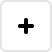
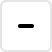
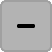
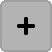
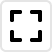
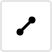
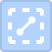
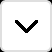
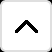
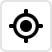
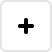
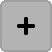
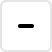
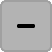
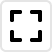
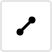
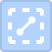
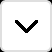
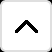
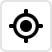

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Default View

In [4]:
g = ggplot(df, aes("drv", "hwy"))

In [5]:
g + geom_sina(seed=42)

## When to Use

In [6]:
gggrid([
    g + geom_boxplot() + ggtitle("geom_boxplot()", "Show distribution but not sample size"),
    g + geom_violin() + ggtitle("geom_violin()", "Show distribution but not sample size"),
    g + geom_jitter(seed=42) + ggtitle("geom_jitter()", "Show sample size but not distribution"),
    g + geom_sina(seed=42) + ggtitle("geom_sina()", "Show both distribution and sample size"),
], ncol=2)

## Avoiding Overlapping Points

`geom_sina()` only uses horizontal jitter. But if there are a lot of points and you don't want them to overlap, you can add an additional vertical jitter. You can use the `position` parameter to do this.

By default, `geom_sina()` uses `position_dodge(.95)`. You can add vertical jitter with `position_jitterdodge()`. But don't forget to use `jitter_width=0` to preserve the shape of the distribution.

In [7]:
gggrid([
    g + geom_sina(seed=42) + ggtitle("Default position"),
    g + geom_sina(seed=42, position=position_jitterdodge(jitter_width=0, seed=42)) + ggtitle("'jitterdodge' position"),
])

## Connection with Violins

In a sina plot, points are randomly positioned within a violin plot using the same parameters.

### Same Shape

In [8]:
g + \
    geom_violin(bw=1.5) + \
    geom_sina(bw=1.5, seed=42)

### Same Quantiles

In [9]:
g + \
    geom_violin(aes(color='..quantile..', fill='..quantile..'), alpha=.5) + \
    geom_sina(aes(color='..quantile..'), size=2, seed=42) + \
    scale_continuous(['color', 'fill'], low="#1a9641", high="#d7191c")

### Same `scale` Values

In [10]:
gggrid([
    g + \
        geom_violin(scale='width') + \
        geom_sina(scale='width', size=1.5, seed=42) + \
        ggtitle("scale='width'"),
    g + \
        geom_violin(scale='area') + \
        geom_sina(scale='area', size=1.5, seed=42) + \
        ggtitle("scale='area'"),
    g + \
        geom_violin(scale='count') + \
        geom_sina(scale='count', size=1.5, seed=42) + \
        ggtitle("scale='count'"),
])

### Compatible Stats

In [11]:
gggrid([
    g + geom_violin() + ggtitle("Violin\nstat='ydensity' (default)"),
    g + geom_violin(stat='sina') + ggtitle("Violin\nstat='sina'"),
    g + geom_sina(size=1.5, seed=42, stat='ydensity') + ggtitle("Sina\nstat='ydensity'"),
    g + geom_sina(size=1.5, seed=42) + ggtitle("Sina\nstat='sina' (default)"),
], ncol=2)

### `show_half` Parameter

In [12]:
g + \
    geom_violin(show_half=-1, size=0, fill="#dddddd") + \
    geom_sina(show_half=1, seed=42)

## Combination with Other Layers

In [13]:
g + \
    geom_violin(aes(fill="drv"), size=0) + \
    geom_sina(aes(color="drv"), seed=42) + \
    scale_color_brewer(palette="Set2") + \
    scale_fill_brewer(palette="Pastel2") + \
    facet_grid(x="year") + \
    coord_flip() + \
    theme_light() + flavor_solarized_dark()